## Convert pic folders into pandas dataframe:

### Image data:
  * Images are scraped from google images manually:
    * [blog link for scraping](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)
  * Images are labeled and cropped manually.
  * Images are saved in a local file (can't distribute on github due to copyrights).
  * Edit image directory for your own code if use data_processing.py:
     * pic folder structure:
       - data/pics:
         - 3 subfolders: eyewear, hat, and beard. 
         - they are classification labels for one vs rest multiclass classification. 
  * Use helper functions from data_processing.py to convert pic folders into a pandas dataframe. 
  * Perform basic exploratory data visualization to check class imbalance, number of images for training and testing, and all column types are string
  * Save pandas dataframe as a pickle for transfer learning. 
     
 -----
 
#### Import Necessary Libaries:

In [1]:
import sys
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

#### Import data_processing.py:

In [2]:
%load_ext autoreload
%autoreload 1

sys.path.append("../python_files/")

import data_processing


%aimport data_processing

---
#### Convert image data folders into a dictionary:
  - dictionary format: 
     * {'pic_id_1':[label1],'pic_id_2':[label1,label3],'pic_id_3':[label2,label3],...}

In [3]:
pic_dict = data_processing.dict_from_data()

----
#### Convert into pandas dataframe for transfer learning:

In [4]:
pic_df = data_processing.create_columns_labels(pic_dict)

----
#### Exploratory data visualization:

#### Check for basic pic_df information


In [5]:
pic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
pic_id     653 non-null object
eyewear    653 non-null object
hat        653 non-null object
beard      653 non-null object
dtypes: object(4)
memory usage: 20.5+ KB


In [6]:
pic_df.head()

,pic_id,eyewear,hat,beard
0,00018.jpg,0,0,1
1,00034.jpg,0,0,1
2,00048.jpg,1,0,0
3,00053.jpg,1,0,0
4,00061.jpg,1,0,0


* There are 653 images and all columns are data type string
----

#### Check class imbalance for one vs all classifiers using transfer learning 

##### Eyewear 

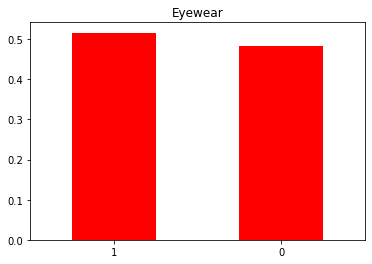

In [7]:
pic_df.eyewear.value_counts(normalize=True).plot.bar(
    color='red', rot=0, title='Eyewear')
plt.show()

##### hat

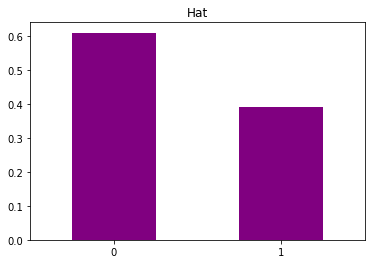

In [8]:
pic_df.hat.value_counts(normalize=True).plot.bar(
    color='purple', rot=0, title='Hat')
plt.show()

##### beard

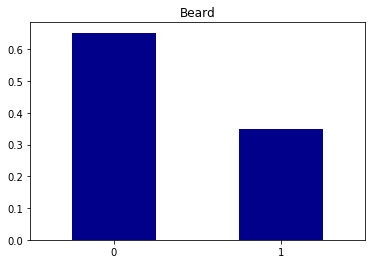

In [9]:
pic_df.beard.value_counts(normalize=True).plot.bar(
    color='darkblue', rot=0, title='Beard')
plt.show()

* There isn't much class imbalance for eyewear but there is some class imbalance for both hat and beard. The class imbalance is not severe for either hat or beard. 

----

#### Save finished dataframe as pickle file for model tuning:

In [10]:
pic_df.to_pickle('../pickle_files/pic_df.pkl')